# Portfolio Allocation_ a)MonteCarlo_b) Optimization Fun.

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*In this notebook, the use of Python for portfolio allocation and optimization, based on historical data of four stocks (Google,Amazon,Netflix and Microsoft), is demonstrated. **Part A** of this project is focused on how to determine the Normalized Return, the portfolio Position (individual & total), the Daily Return, the Cumulative Return and the Sharpe Ratio (Return/Volatility) for one portfolio with different weights (allocations) for each stock. In addition, plots are provided that present a) the trend of the 'Adj Close' price of each stock (January 2011-December 2020), b) the individual stock and total portfolio position and c) the portfolio Total Daily Return Histogram and KDE plot .*

*In the second part of this work (**Part B**), two portfolio optimization examples are provided. In the first case study, there is use of the Monte Carlo method, that requires the creation of large number of portfolios by generating random weights for each portfolio stock so as to determine which portfolio provides the maximum Sharpe Ratio. The second case study presents a more efficient/faster method for determining the portfolio with the maximum Sharpe Ratio (for cases where the allocations number is very large) that is based on minimizing the negative Sharpe Ratio (use of minimize function from scipy.optimize - Solver: Sequential Least Square Programming 'SLSQP'). In the final part of the second case study, for a given set of returns ( with range of values equal to min-max return range determined from the Monte Carlo method), the goal is to minimize the Volatility  so as to determine and plot the lowest risk (volatility) for each of these expected returns (Efficient Frontier).* 




*The Datasets (in pandas dataframe) have been obtained from the Pandas datareader package that enables the creation of a dataframe from internet sources, in this case from **Yahoo! Finance**.*





## Part A: Portfolio Allocation

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [2]:
# Selecting the dataset starting and end date 
start_date=pd.to_datetime('2011-01-01')
end_date=pd.to_datetime('2020-12-31')

In [3]:
# pandas_datareader.data to get data from the web
import pandas_datareader.data as pdr
# Importing google,amazon,netflix & microsoft data 
df_google =pdr.get_data_yahoo("GOOGL",start_date, end_date)
df_amazon =pdr.get_data_yahoo("AMZN",start_date, end_date)
df_netflix=pdr.get_data_yahoo("NFLX",start_date, end_date)
df_microsoft=pdr.get_data_yahoo("MSFT",start_date,end_date)


In [4]:
# First 3 google records
df_google.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,303.098083,298.538544,298.538544,302.477478,4725670.0,302.477478
2011-01-04,303.393402,300.360352,303.113098,301.361359,3645351.0,301.361359
2011-01-05,305.470459,300.325317,300.335327,304.839844,5059535.0,304.839844


In [5]:
# Last 3 google records
df_google.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-29,1788.469971,1755.109985,1787.22998,1757.760010,986300.0,1757.760010
2020-12-30,1767.760010,1728.000000,1765.00000,1736.250000,1051300.0,1736.250000
2020-12-31,1757.500000,1736.089966,1737.27002,1752.640015,1053500.0,1752.640015


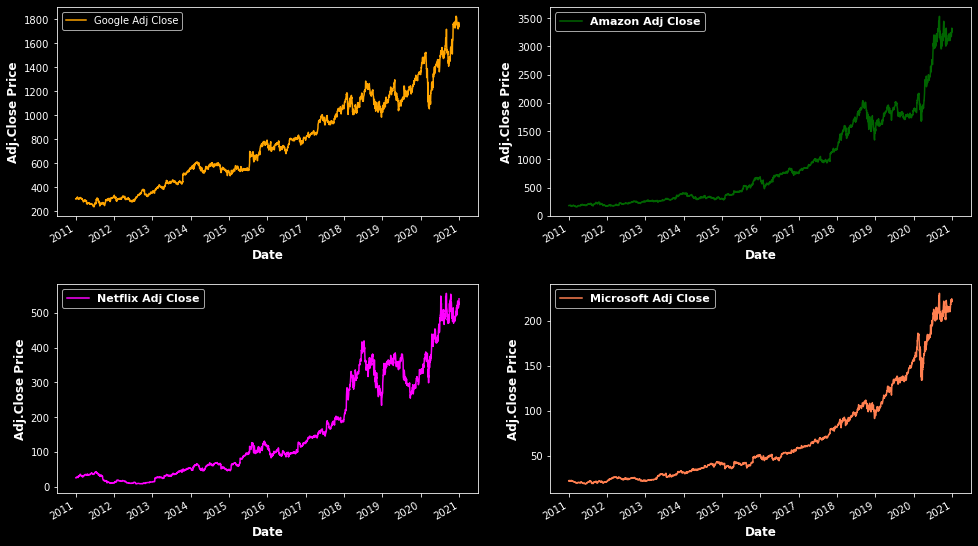

In [6]:
# Google,Amazon,Netflix & Microsoft Ajd.Close price plots
fig,axs=plt.subplots(2,2,figsize=(14,8))

df_google['Adj Close'].plot(label='Google Adj Close',c='orange',ax=axs[0,0])
df_amazon['Adj Close'].plot(label='Amazon Adj Close',c='darkgreen',ax=axs[0,1])
df_netflix['Adj Close'].plot(label='Netflix Adj Close',c='magenta',ax=axs[1,0])
df_microsoft['Adj Close'].plot(label='Microsoft Adj Close',c='coral',ax=axs[1,1])

for ax in axs.flat:
    ax.legend()
   
    plt.rcParams['font.size']='11'
    plt.rcParams['font.weight']='bold'
    ax.set_xlabel('Date',fontweight='bold',fontsize=12)
    ax.set_ylabel('Adj.Close Price',fontweight='bold',fontsize=12)
    ax.figure.tight_layout(pad=2);

In [7]:
# Creating new dataframe containing only the 'Adj Close' column for each stock dataset
google=round(df_google['Adj Close'].to_frame(),3)
amazon=round(df_amazon['Adj Close'].to_frame(),3)
netflix=round(df_netflix['Adj Close'].to_frame(),3)
microsoft=round(df_microsoft['Adj Close'].to_frame(),3)

In [8]:
# 'Normalized Return' is the 'Cumulative Return, which is the return with respect to first date 
# (from date 1 to current date)

for stock in (google,amazon,netflix,microsoft):
    stock['Norm_Return']= round(stock['Adj Close']/stock['Adj Close'][0],4)

In [9]:
# Google 'Normalized Return'
# First 3 records
google.head(3)

,Adj Close,Norm_Return
Date,,
2011-01-03,302.477,1.0000
2011-01-04,301.361,0.9963
2011-01-05,304.840,1.0078


In [10]:
# Google 'Normalized Return'
# Last 3 records
google.tail(3)

,Adj Close,Norm_Return
Date,,
2020-12-29,1757.76,5.8112
2020-12-30,1736.25,5.7401
2020-12-31,1752.64,5.7943


In [11]:
# Stocks Allocation Example --> Google: 35%, Amazon: 10%, Netflix: 45%, Microsoft: 10%
for stock, allocation in zip((google,amazon,netflix,microsoft),[0.35,0.10,0.45,0.10]):
    stock['Stock_Allocation'] = round(stock['Norm_Return']*allocation,4)

In [12]:
# Google 'Stock_Allocation'
# First 3 records
google.head(3)

,Adj Close,Norm_Return,Stock_Allocation
Date,,,
2011-01-03,302.477,1.0000,0.3500
2011-01-04,301.361,0.9963,0.3487
2011-01-05,304.840,1.0078,0.3527


In [13]:
# Creating a new column for the Stock Position assuming that amount=500,000
amount=500000
for stock in (google,amazon,netflix,microsoft):
    stock['Stock_Position']= round(stock['Stock_Allocation']*amount,2)

In [14]:
# Google 'Stock Position'
# First 3 records
google.head(3)

,Adj Close,Norm_Return,Stock_Allocation,Stock_Position
Date,,,,
2011-01-03,302.477,1.0000,0.3500,175000.0
2011-01-04,301.361,0.9963,0.3487,174350.0
2011-01-05,304.840,1.0078,0.3527,176350.0


In [15]:
# Creating a new dataframe containing the 'Positions' of all stocks
portfolio= pd.concat([google['Stock_Position'],amazon['Stock_Position'],netflix['Stock_Position'],
                       microsoft['Stock_Position']],axis=1)
portfolio.columns=['Google_Position','Amazon_Position','Netflix_Position','Microsoft_Position']

In [16]:
# 'Stock Total Position' porfolio
portfolio['Portfolio_Total']=portfolio.sum(axis=1)
# First 5 records
portfolio.head()

,Google_Position,Amazon_Position,Netflix_Position,Microsoft_Position,Portfolio_Total
Date,,,,,
2011-01-03,175000.0,50000.0,225000.0,50000.0,500000.0
2011-01-04,174350.0,50200.0,228750.0,50200.0,503500.0
2011-01-05,176350.0,50850.0,226650.0,50050.0,503900.0
2011-01-06,177650.0,50450.0,224450.0,51500.0,504050.0
2011-01-07,178500.0,50350.0,226100.0,51100.0,506050.0


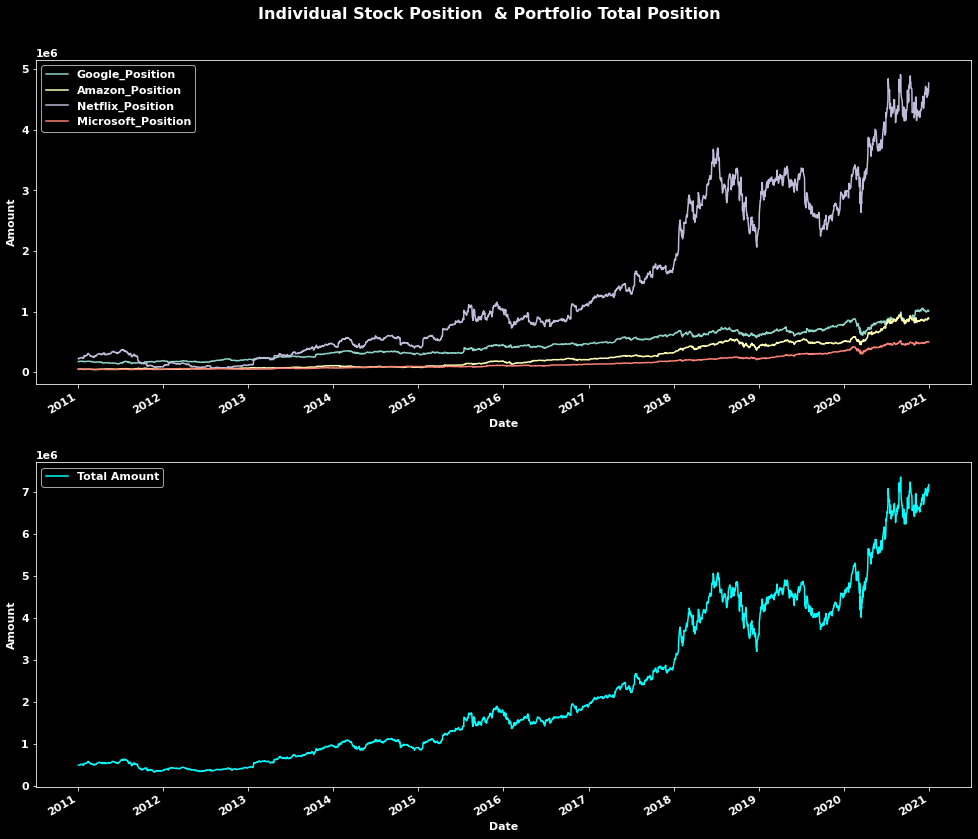

In [17]:
# Total Position of each Stock & Portfolio_Total plots
fig,axs=plt.subplots(2,1,figsize=(14,12))
portfolio.drop('Portfolio_Total',axis=1).plot(ax=axs[0])
portfolio['Portfolio_Total'].plot(label='Total Amount',c='cyan',ax=axs[1])
plt.suptitle('Individual Stock Position  & Portfolio Total Position',fontweight='bold',fontsize=16)
for ax in axs.flat:
    plt.legend()
    ax.set_xlabel('Date',fontweight='bold')
    ax.set_ylabel('Amount',fontweight='bold')
    ax.figure.tight_layout(pad=2)

In [18]:
# Total Daily Return-> use of shift function

portfolio['Daily_Return']=(portfolio['Portfolio_Total']- 
                           portfolio['Portfolio_Total'].shift(1))/(portfolio['Portfolio_Total'].shift(1))
portfolio.head()

,Google_Position,Amazon_Position,Netflix_Position,Microsoft_Position,Portfolio_Total,Daily_Return
Date,,,,,,
2011-01-03,175000.0,50000.0,225000.0,50000.0,500000.0,NaN
2011-01-04,174350.0,50200.0,228750.0,50200.0,503500.0,0.007000
2011-01-05,176350.0,50850.0,226650.0,50050.0,503900.0,0.000794
2011-01-06,177650.0,50450.0,224450.0,51500.0,504050.0,0.000298
2011-01-07,178500.0,50350.0,226100.0,51100.0,506050.0,0.003968


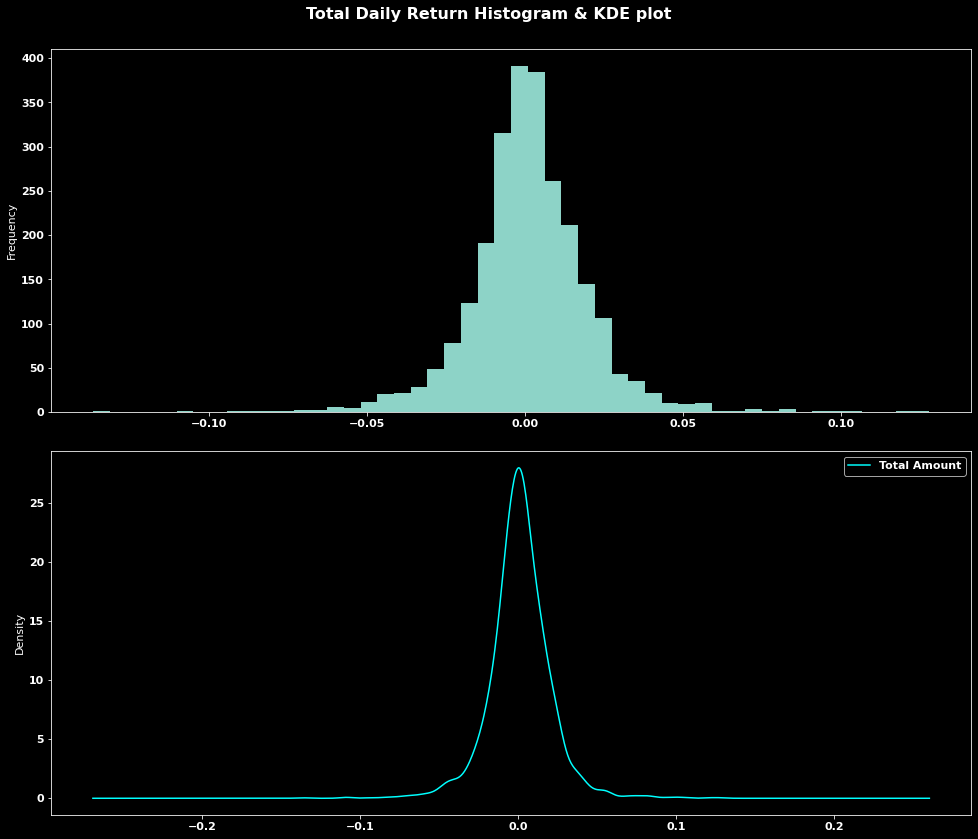

In [19]:
# Total Daily Return histogram and KDE plot
fig,axs=plt.subplots(2,1,figsize=(14,12))

portfolio['Daily_Return'].plot(kind='hist',bins=50,ax=axs[0])
portfolio['Daily_Return'].plot(label='Total Amount',c='cyan',kind='kde',ax=axs[1])

plt.suptitle('Total Daily Return Histogram & KDE plot',fontweight='bold',fontsize=16)
for ax in axs.flat:
    plt.legend()
    ax.figure.tight_layout(pad=2)

In [20]:
# Portfolio cumulative return

Portfolio_Cum_Return = ((portfolio['Portfolio_Total'][-1] - portfolio['Portfolio_Total'][0])/
                        (portfolio['Portfolio_Total'][0]))*100
print('Portfolio Cumulative Return is: {}%'.format(round(Portfolio_Cum_Return,2)))


Portfolio Cumulative Return is: 1334.3%


In [21]:
# Portfolio Total Daily and Annual Sharpe Ratio

Daily_Sharpe_Ratio= portfolio['Daily_Return'].mean()/portfolio['Daily_Return'].std()
print('Portfolio Total Daily Sharpe Ratio is: {}'.format(round(Daily_Sharpe_Ratio,4)))
Annual_Sharpe_Ratio=Daily_Sharpe_Ratio*np.sqrt(252)
print('\r')
print('Portfolio Total Annual Sharpe Ratio is: {}'.format(round(Annual_Sharpe_Ratio,4)))

Portfolio Total Daily Sharpe Ratio is: 0.0639

Portfolio Total Annual Sharpe Ratio is: 1.0142


## Part B: Portfolio Optimization
### a) Monte Carlo

In [22]:
# Creating a new dataframe with columns the 'Adj Close' of each stock
portfolio_adjclose= pd.concat([google['Adj Close'],amazon['Adj Close'],netflix['Adj Close'],
                       microsoft['Adj Close']],axis=1)
portfolio_adjclose.columns=['Google_AdjClose','Amazon_AdjClose','Netflix_AdjClose','Microsoft_AdjClose']
portfolio_adjclose.head()

,Google_AdjClose,Amazon_AdjClose,Netflix_AdjClose,Microsoft_AdjClose
Date,,,,
2011-01-03,302.477,184.22,25.487,22.195
2011-01-04,301.361,185.01,25.910,22.282
2011-01-05,304.840,187.42,25.676,22.211
2011-01-06,307.057,185.86,25.427,22.861
2011-01-07,308.529,185.49,25.614,22.687


In [23]:
#Daily_Return for each stock
Daily_Return_stocks=(portfolio_adjclose-portfolio_adjclose.shift(1))/(portfolio_adjclose.shift(1))
Daily_Return_stocks.head()

,Google_AdjClose,Amazon_AdjClose,Netflix_AdjClose,Microsoft_AdjClose
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,-0.003690,0.004288,0.016597,0.003920
2011-01-05,0.011544,0.013026,-0.009031,-0.003186
2011-01-06,0.007273,-0.008324,-0.009698,0.029265
2011-01-07,0.004794,-0.001991,0.007354,-0.007611


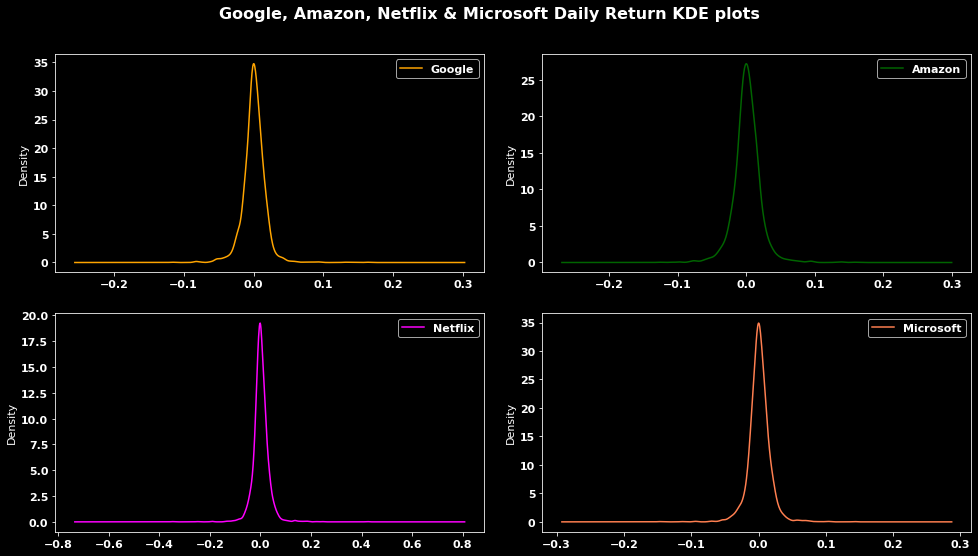

In [24]:
# Google, Amazon, Netflix & Microsoft Daily Return KDE plots
fig,axs=plt.subplots(2,2,figsize=(14,8))
Daily_Return_stocks['Google_AdjClose'].plot(kind='kde',c='orange',label='Google',ax=axs[0,0])
Daily_Return_stocks['Amazon_AdjClose'].plot(kind='kde',c='darkgreen',label='Amazon',ax=axs[0,1])
Daily_Return_stocks['Netflix_AdjClose'].plot(kind='kde',c='magenta',label='Netflix',ax=axs[1,0])
Daily_Return_stocks['Microsoft_AdjClose'].plot(kind='kde',c='coral',label='Microsoft',ax=axs[1,1])

plt.suptitle('Google, Amazon, Netflix & Microsoft Daily Return KDE plots',fontweight='bold',fontsize=16)
for ax in axs.flat:
    ax.legend()
    ax.figure.tight_layout(pad=2)


In [25]:
# Mean Daily Return for each stock
Daily_Return_stocks.mean()

Google_AdjClose       0.000829
Amazon_AdjClose       0.001340
Netflix_AdjClose      0.001728
Microsoft_AdjClose    0.001047
dtype: float64

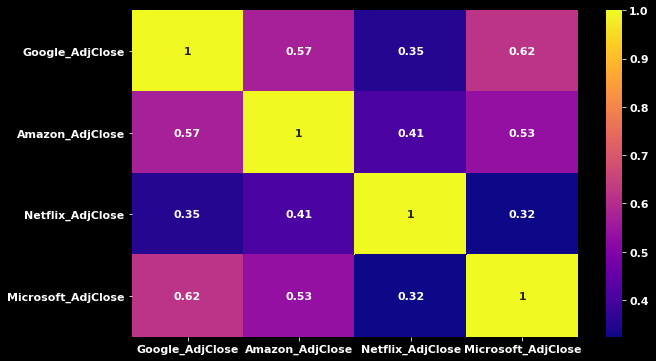

In [26]:
# Heatmap --> Pearson Correlation Coefficient between all stocks based on their Daily Returns
plt.figure(figsize=(10,6))
sns.heatmap(Daily_Return_stocks.corr(),annot=True,cmap='plasma')
plt.show()

In [27]:
# Use of log returns as they are time consistent
Daily_Return_log= np.log(portfolio_adjclose/portfolio_adjclose.shift(1))
Daily_Return_log.head()

,Google_AdjClose,Amazon_AdjClose,Netflix_AdjClose,Microsoft_AdjClose
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,-0.003696,0.004279,0.016460,0.003912
2011-01-05,0.011478,0.012942,-0.009072,-0.003192
2011-01-06,0.007246,-0.008358,-0.009745,0.028845
2011-01-07,0.004782,-0.001993,0.007327,-0.007640


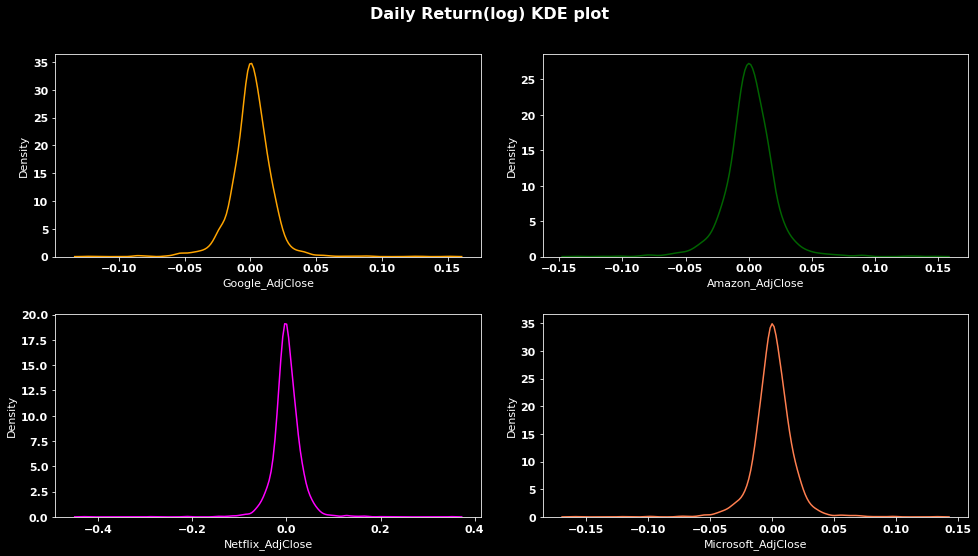

In [47]:
# KDE plots for the Daily Return (log) of each stock
fig,axs=plt.subplots(2,2,figsize=(14,8))
sns.kdeplot(x='Google_AdjClose', data=Daily_Return_log,c='orange',ax=axs[0,0])
sns.kdeplot(x='Amazon_AdjClose', data=Daily_Return_log,c='darkgreen',ax=axs[0,1])
sns.kdeplot(x='Netflix_AdjClose', data=Daily_Return_log,c='magenta',ax=axs[1,0])
sns.kdeplot(x='Microsoft_AdjClose', data=Daily_Return_log,c='coral',ax=axs[1,1])
plt.suptitle('Daily Return(log) KDE plot',fontweight='bold',fontsize=16)
for ax in axs.flat:
    ax.figure.tight_layout(pad=2)

In [29]:
# Monte Carlo to determine the maximum Sharpe Ratio
np.random.seed(0)
def random_portfolios():
    portfolios = 20000

    portfolios_weights = np.zeros((portfolios,len(portfolio_adjclose.columns)))
    portfolios_returns = [0]*portfolios
    portfolios_volatility = [0]*portfolios
    SharpeRatio = [0]*portfolios

    for i in range(portfolios):

        # Random weights for each portfolio
        random_weights = np.array(np.random.random(4))
        #Rescaled random weights for each portfolio
        rescaled_random_weights=random_weights/ np.sum(random_weights)
        # Saving the weights of each random portfolio combination
        portfolios_weights[i,:] = rescaled_random_weights
        # Saving each portfolio Return
        portfolios_returns[i] = np.sum((Daily_Return_log.mean() *rescaled_random_weights) *252)
        # Saving each portfolio Volatility/Variance 
        portfolios_volatility[i]=np.sqrt(np.dot(rescaled_random_weights,np.dot(Daily_Return_log.cov()*252,
                                                                               rescaled_random_weights)))
        # Saving each portfolio Sharpe Ratio
        SharpeRatio[i] = portfolios_returns[i]/portfolios_volatility[i]
    return (np.max(SharpeRatio),np.argmax(SharpeRatio),portfolios_weights[np.argmax(SharpeRatio),:],
               portfolios_returns[np.argmax(SharpeRatio)],portfolios_volatility[np.argmax(SharpeRatio)],portfolios_returns,
           portfolios_volatility,SharpeRatio)

Results=random_portfolios()


In [30]:
# Monte Carlo results with respect to maximum Sharpe Ratio
SharpeRatio_Max=Results[0]
SharpeRatio_Ind=Results[1]
SharpeRatio_Weights=Results[2]
SharpeRatio_Return=Results[3]
SharpeRatio_Volatility=Results[4]
print('Maximum Sharpe Ratio: {}'.format(SharpeRatio_Max))
print('\r')
print('Max Sharpe Ratio Index: {}'.format(SharpeRatio_Ind))
print('\r')
print('Weights Corresponding to Maximum Sharpe Ratio:\n{}'.format(SharpeRatio_Weights))
print('\r')
print('Return Corresponding to Maximum Sharpe Ratio:\n{}'.format(SharpeRatio_Return))
print('\r')
print('Volatility Corresponding to Maximum Sharpe Ratio:\n{}'.format(SharpeRatio_Volatility))

Maximum Sharpe Ratio: 1.048374325111658

Max Sharpe Ratio Index: 17588

Weights Corresponding to Maximum Sharpe Ratio:
[0.00577934 0.37817106 0.08523909 0.53081051]

Return Corresponding to Maximum Sharpe Ratio:
0.2583038366384331

Volatility Corresponding to Maximum Sharpe Ratio:
0.246385122614408


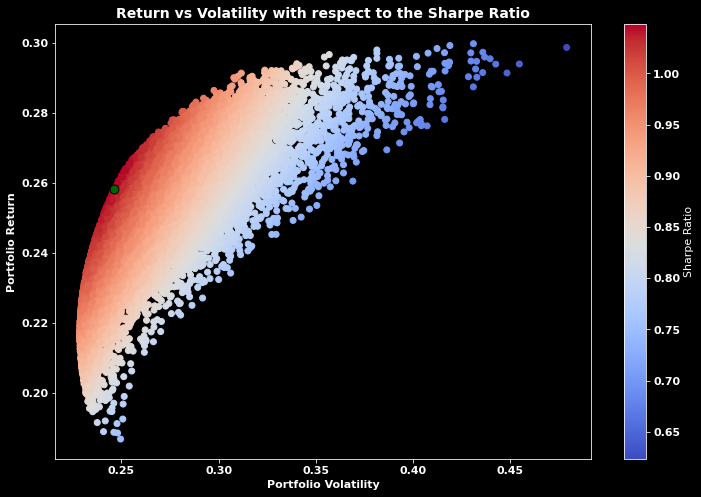

In [31]:
# Plot of Returns vs Volatility with respect to the Sharpe Ratio
Portfolio_Returns=Results[5]
Portfolio_Volatilities=Results[6]
Portfolio_SharpeRatios=Results[7]
plt.figure(figsize=(12,8))
plt.scatter(Portfolio_Volatilities,Portfolio_Returns,c=Portfolio_SharpeRatios,cmap='coolwarm')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility',fontweight='bold')
plt.ylabel('Portfolio Return',fontweight='bold')
plt.title('Return vs Volatility with respect to the Sharpe Ratio',fontweight='bold',fontsize=14)

# Green dot indicates maximum Sharpe Ratio
plt.scatter(SharpeRatio_Volatility,SharpeRatio_Return,c='darkgreen',s=80,edgecolors='black');

### b) Sequential Least Squares Programming (SLSQP)
#### i) Minimizing Neg Sharpe Ratio

In [32]:
# Function to return the portfolio Returns, Volatilities and Sharpe Ratios
def portfolio_optimization(portfolio_w):
    
    portfolio_w = np.array(portfolio_w)
    portfolio_r = np.sum(Daily_Return_log.mean() * portfolio_w) * 252
    portfolio_v = np.sqrt(np.dot(portfolio_w, np.dot(Daily_Return_log.cov() * 252, portfolio_w)))
    portfolio_SharpeRatio = portfolio_r/portfolio_v
    return (portfolio_r,portfolio_v,portfolio_SharpeRatio)


In [33]:
# In order to optimize the portfolio, the goal is to try and minimize the negative Sharpe Ratio
def sharperatio_neg(portfolio_w):
    return  portfolio_optimization(portfolio_w)[2] * (-1)

In [34]:
# Constraint to ensure that the sum of all stock weights is equal to 1 
def sum_portfolio_w(portfolio_w):
    
    return np.sum(portfolio_w) - 1

In [35]:
# Type of constraint(Equation) and the function that is required to be passed, that is the one that ensures that the sum of all 
# stock weights is equal to 1 
constraints = ({'type':'eq','fun':sum_portfolio_w})

In [36]:
# Bound to ensure that each stock allocation(portfolio weight) has a value between 0 and 1
portfolio_w_b = ((0, 1), (0, 1), (0, 1), (0, 1))

In [37]:
# Each stock allocation has been initialized with the same portfolio weight value
portfolio_w_initialization = [0.25,0.25,0.25,0.25]

In [38]:
# Importing the minimize function from scipy.optimize
from scipy.optimize import minimize
# Minimization function: Solver type-->SLSQP
min_res = minimize(fun=sharperatio_neg,x0=portfolio_w_initialization,method='SLSQP',bounds=portfolio_w_b,
                       constraints=constraints)

In [39]:
# Minimization Results
min_res

     fun: -1.0492912825035423
     jac: array([ 3.60580981e-02,  2.58237123e-05, -2.15232372e-04,  1.89244747e-05])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([2.60208521e-18, 4.06497466e-01, 9.28093433e-02, 5.00693191e-01])

In [40]:
# Optimization results with respect to maximum Sharpe Ratio
# Maximum Sharpe Ratio is slightly higher compared to the determined Sharpe Ratio by use of random allocation (Monte Carlo)
Port_Return=portfolio_optimization(min_res.x)[0]
Port_Volatility=portfolio_optimization(min_res.x)[1]
Port_SharpeRatio=portfolio_optimization(min_res.x)[2]
print('Portfolio Weights (Optimization Algorithm):')
print('\r')
print(min_res.x)
print('\r')
print('Portfolio Return, Volatily & Sharpe Ratio with respect to the Portfolio Weights:')
print('\r')
print('Portfolio Return: {}'.format(Port_Return))
print('Portfolio Volatility: {}'.format(Port_Volatility))
print('Portfolio Sharpe Ratio: {}'.format(Port_SharpeRatio))

Portfolio Weights (Optimization Algorithm):

[2.60208521e-18 4.06497466e-01 9.28093433e-02 5.00693191e-01]

Portfolio Return, Volatily & Sharpe Ratio with respect to the Portfolio Weights:

Portfolio Return: 0.2608072692279667
Portfolio Volatility: 0.24855564281988232
Portfolio Sharpe Ratio: 1.0492912825035423


#### ii) Minimizing Volatility (Efficient Frontier Line)

In [41]:
# Creating linear space of return values based on the min and max returns presented in the previous return-volatility plot
e_f_return = np.linspace(0.18,0.31,200) 

In [42]:
# In this part, the goal is to use the set of returns defined in the previous cell based on the Monte Carlo return-volatility
# plot (that represent the highest expected returns for a different risk levels) so as to determine the lowest risk (volatility) 
# for each of these returns (Efficient Frontier)
def volatility_optimization(portfolio_w):
    return  portfolio_optimization(portfolio_w)[1] # return volatility

In [43]:
# For every Return value between 0.18 and 0.31 (e_f_return), based on the provided constraints (sum of all weights equal to 1
# and return not greater than the e_f_return values) and bounds(each stock weight between 0-1), there is use of the minimize 
# function to determine the lowest risk (volatility) with respect to each of the returns
opt_volatility=[]
opt_weights=[]
for i in e_f_return:
    
    constraints = ({'type':'eq','fun': sum_portfolio_w},
            {'type':'eq','fun': lambda x: portfolio_optimization(x)[0] - i})
    
    vol_res = minimize(fun=volatility_optimization,x0=portfolio_w_initialization,method='SLSQP',bounds=portfolio_w_b,
                      constraints=constraints)
    
    opt_volatility.append(vol_res['fun'])
    opt_weights.append(vol_res.x)

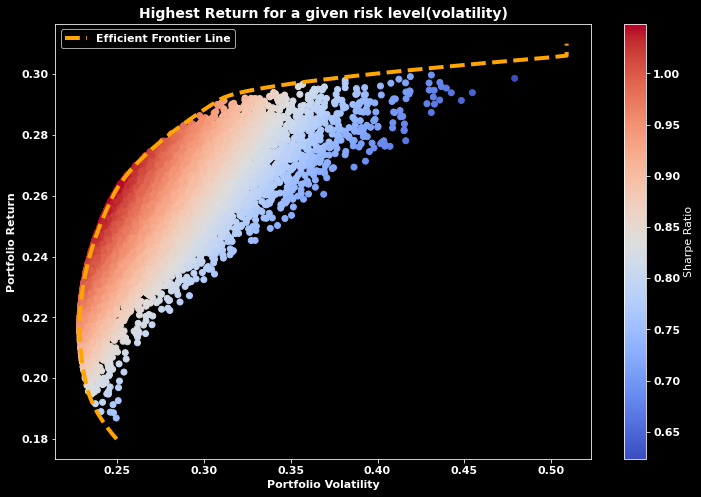

In [44]:
# Plot of Returns vs Volatility with respect to the Sharpe Ratio
Portfolio_Returns=Results[5]
Portfolio_Volatilities=Results[6]
Portfolio_SharpeRatios=Results[7]
plt.figure(figsize=(12,8))
plt.scatter(Portfolio_Volatilities,Portfolio_Returns,c=Portfolio_SharpeRatios,cmap='coolwarm')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility',fontweight='bold')
plt.ylabel('Portfolio Return',fontweight='bold')
plt.title('Highest Return for a given risk level(volatility)',fontweight='bold',fontsize=14)


# Efficient Frontier plot
plt.plot(opt_volatility,e_f_return,linestyle='dashed',linewidth=4,c='orange',label='Efficient Frontier Line')
plt.legend();

In [45]:
# Dataframe consisting of the portfolios, risk levels (volatilities),returns and Sharpe Ratios
df_optimalportfolios=pd.DataFrame(opt_weights)
df_optimalportfolios.columns=['Google','Amazon','Netflix','Microsoft']
df_optimalportfolios['Volatility']=opt_volatility
df_optimalportfolios['Return']=e_f_return
df_optimalportfolios['Sharpe Ratio']=e_f_return/opt_volatility


In [46]:
# Optimal Portfolios for a risk level (volatility) around 0.25
df_optimalportfolios[(df_optimalportfolios['Volatility']>=0.2499)&(df_optimalportfolios['Volatility']<0.251)]

,Google,Amazon,Netflix,Microsoft,Volatility,Return,Sharpe Ratio
126,6.505213e-19,0.424847,0.098870,0.476283,0.250076,0.262312,1.048926
127,0.000000e+00,0.432865,0.101464,0.465671,0.250791,0.262965,1.048543
